In [12]:
import pandas as pd
import numpy as np

import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [13]:
# dataset = pd.read_csv('data/data-tc.csv')
# X = pd.read_csv('data/data-tc.csv', usecols=['Complexity', 'Time', 'Cost'])
dataset = pd.read_csv('data/kmeans/data-preprocess.csv').drop(['B_Req'], axis=1)
X = pd.read_csv('data/kmeans/data-preprocess.csv', usecols=['Complexity', 'Time', 'Cost'])

In [14]:
B_Req = ctrl.Antecedent(np.arange(0, 201, 1), 'B_Req')
R_Priority = ctrl.Antecedent(np.arange(0, 201, 1), 'R_Priority')
Complexity = ctrl.Antecedent(np.arange(1, 6, 1), 'Complexity')
Time = ctrl.Antecedent(np.arange(1, 6, 1), 'Time')
Cost = ctrl.Antecedent(np.arange(20, 101, 1), 'Cost')

Rank = ctrl.Consequent(np.arange(1, 4, 1), 'Rank')

In [15]:
Complexity.automf(3)
Time.automf(3)
Cost.automf(3)

In [16]:
Rank['low'] = fuzz.trimf(Rank.universe, [1, 1, 1])
Rank['medium'] = fuzz.trimf(Rank.universe, [2, 2, 2])
Rank['high'] = fuzz.trimf(Rank.universe, [3, 3, 3])

Complexity['low'] = fuzz.trimf(Complexity.universe, [1, 2, 3])
Complexity['medium'] = fuzz.trimf(Complexity.universe, [2, 3, 4])
Complexity['high'] = fuzz.trimf(Complexity.universe, [3, 4, 5])

Time['low'] = fuzz.trimf(Time.universe, [1, 7, 14])
Time['medium'] = fuzz.trimf(Time.universe, [7, 14, 21])
Time['high'] = fuzz.trimf(Time.universe, [14, 21, 28])

Cost['low'] = fuzz.trimf(Cost.universe, [7, 50, 100])
Cost['medium'] = fuzz.trimf(Cost.universe, [50, 100, 150])
Cost['high'] = fuzz.trimf(Cost.universe, [100, 150, 210])

In [17]:
rule1 = ctrl.Rule(Complexity['low'] | Time['low'] | Cost['low'], Rank['low'])
rule2 = ctrl.Rule(Complexity['high'] | Time['low'] | Cost['low'], Rank['low'])
rule3 = ctrl.Rule(Complexity['medium'] | Time['high'] | Cost['medium'], Rank['low'])
rule4 = ctrl.Rule(Complexity['high'] | Time['medium'] | Cost['medium'], Rank['low'])
rule5 = ctrl.Rule(Complexity['low'] | Time['high'] | Cost['low'], Rank['low'])
rule6 = ctrl.Rule(Complexity['medium'] | Time['high'] | Cost['low'], Rank['low'])
rule7 = ctrl.Rule(Complexity['low'] & Time['low'] & Cost['low'], Rank['low'])
rule8 = ctrl.Rule(Complexity['low'] | Time['medium'] | Cost['medium'], Rank['low'])
rule9 = ctrl.Rule(Complexity['low'] | Time['low'] | Cost['medium'], Rank['low'])
rule10 = ctrl.Rule(Complexity['medium'] | Time['low'] | Cost['low'], Rank['low'])
rule11 = ctrl.Rule(Complexity['low'] | Time['medium'] | Cost['low'], Rank['low'])
rule12 = ctrl.Rule(Complexity['medium'] | Time['medium'] | Cost['medium'], Rank['medium'])
rule13 = ctrl.Rule(Complexity['medium'] | Time['medium'] | Cost['medium'], Rank['medium'])
rule14 = ctrl.Rule(Complexity['medium'] | Time['high'] | Cost['high'], Rank['high'])
rule15 = ctrl.Rule(Complexity['high'] | Time['medium'] | Cost['low'], Rank['medium'])
rule16 = ctrl.Rule(Complexity['low'] | Time['medium'] | Cost['high'], Rank['medium'])
rule17 = ctrl.Rule(Complexity['low'] | Time['high'] | Cost['medium'], Rank['medium'])
rule18 = ctrl.Rule(Complexity['medium'] | Time['high'] | Cost['low'], Rank['medium'])
rule19 = ctrl.Rule(Complexity['high'] | Time['high'] | Cost['low'], Rank['medium'])
rule20 = ctrl.Rule(Complexity['low'] | Time['medium'] | Cost['medium'], Rank['medium'])
rule21 = ctrl.Rule(Complexity['high'] | Time['low'] | Cost['medium'], Rank['medium'])
rule22 = ctrl.Rule(Complexity['medium'] & Time['medium'] & Cost['medium'], Rank['medium'])
rule23 = ctrl.Rule(Complexity['low'] & Time['medium'] | Cost['high'], Rank['medium'])
rule24 = ctrl.Rule(Complexity['high'] | Time['high'] | Cost['high'], Rank['high'])
rule25 = ctrl.Rule(Complexity['high'] | Time['high'] | Cost['high'], Rank['high'])
rule26 = ctrl.Rule(Complexity['medium'] | Time['low'] | Cost['medium'], Rank['high'])
rule27 = ctrl.Rule(Complexity['high'] | Time['low'] | Cost['high'], Rank['high'])
rule28 = ctrl.Rule(Complexity['low'] | Time['high'] | Cost['high'], Rank['high'])
rule29 = ctrl.Rule(Complexity['medium'] | Time['medium'] | Cost['high'], Rank['high'])
rule30 = ctrl.Rule(Complexity['high'] | Time['medium'] | Cost['high'], Rank['high'])
rule31 = ctrl.Rule(Complexity['medium'] | Time['high'] | Cost['high'], Rank['high'])
rule32 = ctrl.Rule(Complexity['low'] | Time['medium'] | Cost['high'], Rank['high'])
rule33 = ctrl.Rule(Complexity['high'] & Time['high'] & Cost['high'], Rank['high'])
rule34 = ctrl.Rule(Complexity['high'] | Time['medium'] & Cost['low'], Rank['high'])

ranking_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
    rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
    rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, 
    rule29, rule30, rule31, rule32, rule33, rule34
])

ranking_system = ctrl.ControlSystemSimulation(ranking_ctrl)

In [18]:
for index,rows in X.iterrows():
    ranking_system.input['Complexity'] = rows['Complexity']
    ranking_system.input['Time'] = rows['Time']
    ranking_system.input['Cost'] = rows['Cost']
    ranking_system.compute()
    result = ranking_system.output['Rank']
    X['Class'] = round(result)    

In [19]:
prediction = 0
for index,rows in dataset.iterrows():
    if int(rows['Class']) == int(X['Class'][index]):
        prediction += 1
        
accuracy = prediction / len(dataset) 
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.33


In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_test = dataset['Class']
y_pred = X['Class']

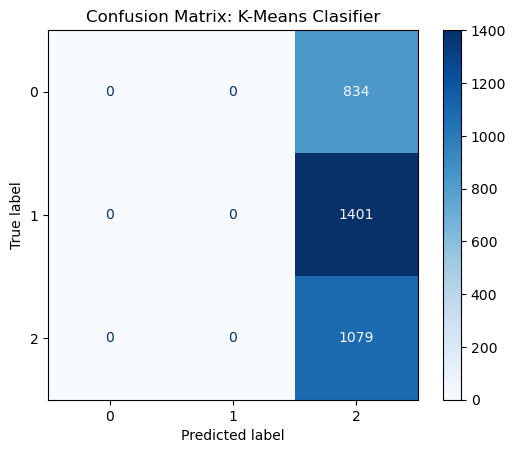

In [21]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: K-Means Clasifier")
plt.show()

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       834
           1       0.00      0.00      0.00      1401
           2       0.33      1.00      0.49      1079

    accuracy                           0.33      3314
   macro avg       0.11      0.33      0.16      3314
weighted avg       0.11      0.33      0.16      3314



c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Menghitung precision
precision = precision_score(y_test, y_pred, average='micro')

# Menghitung recall
recall = recall_score(y_test, y_pred, average='micro')

# Menghitung F1-score
f1 = f1_score(y_test, y_pred, average='micro')

print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1-score:", f1 * 100)

Precision: 32.55884127942064
Recall: 32.55884127942064
F1-score: 32.55884127942064
